<a href="https://colab.research.google.com/github/Alanmc021/k-means-spotify-track-dataset/blob/main/ELT574_ES119694_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-means-spotify-track-dataset



       nome  danceability    energy   loudness       tempo   valence
0  Música_0      0.374540  0.031429 -21.478101   57.752258  0.103124
1  Música_1      0.950714  0.636410 -54.951602  129.703195  0.902553
2  Música_2      0.731994  0.314356 -50.302277  131.095268  0.505252
3  Música_3      0.598658  0.508571  -6.086749  145.614485  0.826457
4  Música_4      0.156019  0.907566 -23.614256  158.913700  0.320050


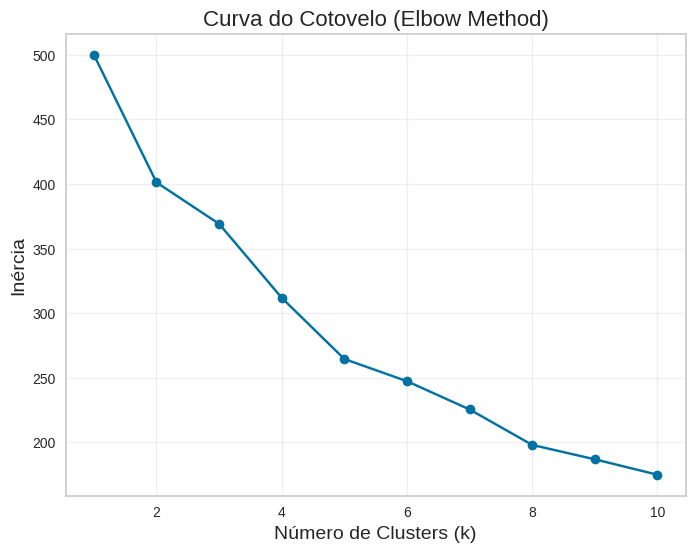

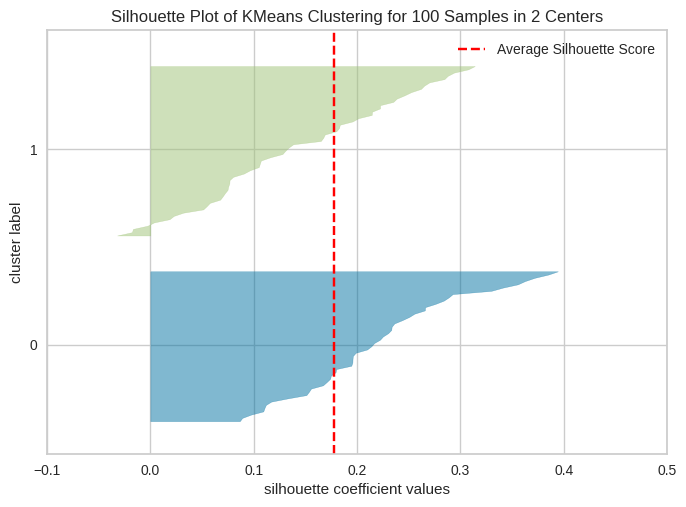

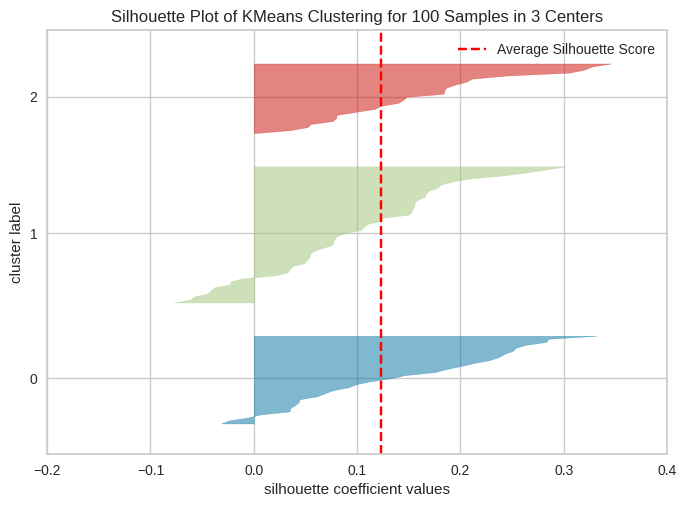

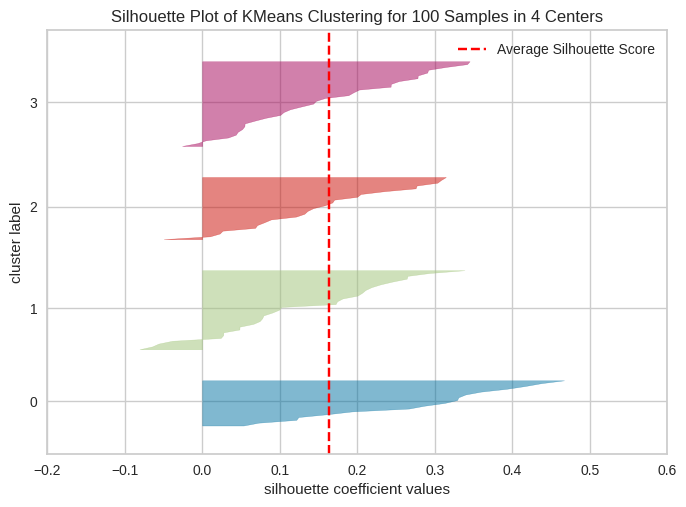

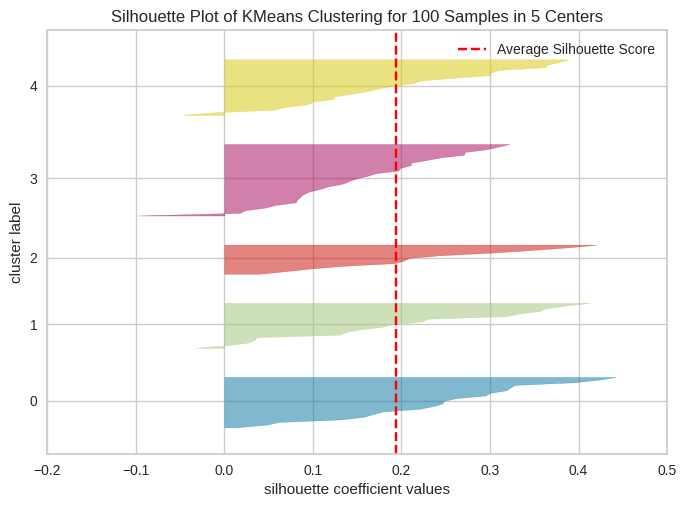

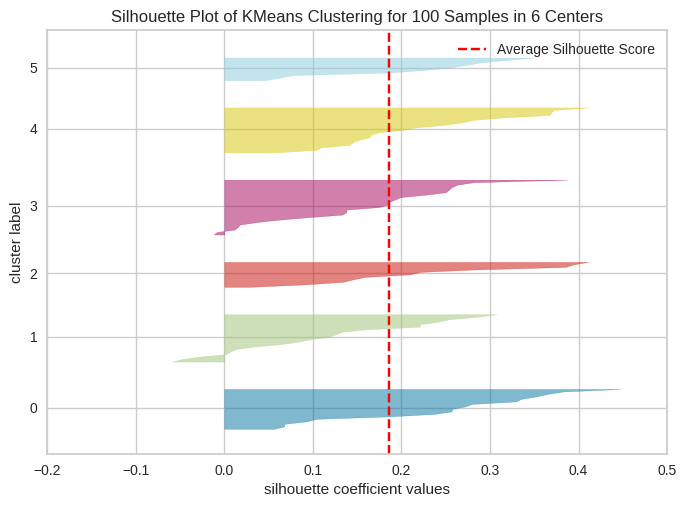

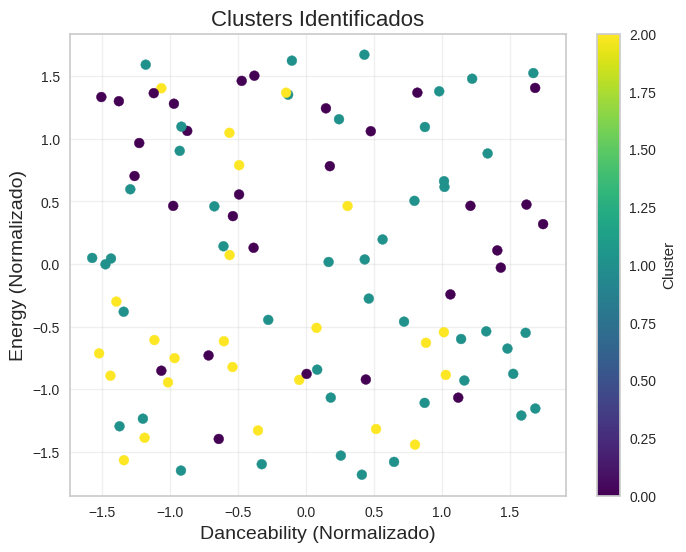

       nome  danceability    energy   loudness       tempo   valence  Cluster
0  Música_0      0.374540  0.031429 -21.478101   57.752258  0.103124        1
1  Música_1      0.950714  0.636410 -54.951602  129.703195  0.902553        0
2  Música_2      0.731994  0.314356 -50.302277  131.095268  0.505252        2
3  Música_3      0.598658  0.508571  -6.086749  145.614485  0.826457        1
4  Música_4      0.156019  0.907566 -23.614256  158.913700  0.320050        2


In [5]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Carregando o arquivo CSV
file_path = '/content/drive/My Drive/musicas_spotify_limpo.csv'
df = pd.read_csv(file_path)

# Visualizando os dados
print(df.head())

# Selecionando apenas colunas numéricas para análise
numeric_columns = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
data = df[numeric_columns]

# Normalizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Etapa 1: Curva do Cotovelo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Curva do Cotovelo (Elbow Method)', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=14)
plt.ylabel('Inércia', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Etapa 2: Diagrama de Silhueta
for k in range(2, 7):  # Testando entre 2 e 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(data_scaled)
    visualizer.show()

# Etapa 3: Treinando o modelo final com o número ideal de clusters
optimal_k = 3  # Escolha o valor ideal baseado nos gráficos acima
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(data_scaled)

# Adicionando os clusters ao DataFrame original
df['Cluster'] = clusters

# Visualizando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters Identificados', fontsize=16)
plt.xlabel('Danceability (Normalizado)', fontsize=14)
plt.ylabel('Energy (Normalizado)', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# Mostrando os primeiros resultados do DataFrame com clusters
print(df.head())
